### 201600974 무역학과 김효훈 lab 5

In [242]:
import re, math,random
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from functools import partial,reduce

import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def vector_add(v,w):
    return [v_i + w_i for v_i,w_i in zip(v,w)]

v = [x for x in range(1,11,2)]
w = [y for y in range(11,21,2)]

%timeit vector_add(v,w)
%timeit np.array(v) + np.array(w)

935 ns ± 7.09 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.75 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [243]:
def vector_subtract(v,w):
    return [v_i-w_i for v_i,w_i in zip(v,w)]

vector_subtract(v,w)
np.array(v) - np.array(w)

[-10, -10, -10, -10, -10]

array([-10, -10, -10, -10, -10])

In [133]:
#v1
def vector_sum(vectors):
    return reduce(vector_add,vectors)

#v2
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]


vectors = [v,w,v,w,v,w]

vector_sum(vectors)

vector_sum_modified(vectors)

[36, 48, 60, 72, 84]

[36, 48, 60, 72, 84]

In [134]:
def scalar_multiply(c,v):
    return [c*v_i for v_i in v]

scalar = 3

scalar_multiply(scalar,v)

scalar * np.array(v)

[3, 9, 15, 21, 27]

array([ 3,  9, 15, 21, 27])

In [135]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

vector_mean([v,w,v,w])

np.mean([v,v,v,v])

[-1.5, -0.5, 0.5, 1.5]

2.5

In [136]:
def dot(v,w):
    return sum(v_i* w_i for v_i,w_i in zip(v,w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

dot(v,w)

np.dot(v,w)

-20

-20

In [137]:
def sum_of_squares(v):
    return dot(v,v)

v = [1,2,3,4]

sum_of_squares(v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(v)


np.linalg.norm(v)

30

5.477225575051661

5.477225575051661

In [138]:
def squared_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(squared_distance(v,w))

v=[1,2,3,4]
w=[-4,-3,-2,-1]

squared_distance(v,w)

distance(v,w)

np.linalg.norm(np.subtract(v,w))

100

10.0

10.0

In [139]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A,i):
    return A[i]

def get_column(A,j):
    return [A_i[j] for A_i in A]

example_matrix = [[1,2,3,4,5],[11,12,13,14,15],[21,22,23,24,25]]

shape(example_matrix)
get_row(example_matrix,0)
get_column(example_matrix,3)

np.shape(example_matrix)
example_matrix = np.array(example_matrix)
example_matrix[0]
example_matrix[:3]

(3, 5)

[1, 2, 3, 4, 5]

[4, 14, 24]

(3, 5)

array([1, 2, 3, 4, 5])

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15],
       [21, 22, 23, 24, 25]])

In [140]:
def make_matrix(num_rows,num_cols,entry_fn):
    return [[entry_fn(i,j) for j in range(num_cols)] for i in range(num_rows)]

def is_diagonal(i,j):
    return 1 if i==j else 0

identity_matrix = make_matrix(5,5,is_diagonal)

identity_matrix

np.identity(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [141]:
friendships =[(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]


def makebinaryMat(index,row,col):
    matrix = [[0 for x in np.arange(0,row)] for _ in range(col) ]
    r,c = zip(*index)
    for i in range(row):
        matrix[r[i]][c[i]] = 1
    for j in range(col):
        matrix[c[j]][r[j]] = 1
    return matrix
    
    
makebinaryMat(friendships,10,10)

print(friends)

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

[0, 1]


In [142]:
def matrix_add(A,B):
    if shape(A) !=shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows,num_cols = shape(A)
    
    def entry_fn(i,j):
        return A[i][j] + B[i][j]

    return make_matrix(num_rows,num_cols,entry_fn)

A=[[1.,0.,0.],[0.,1.,2.]]
B=[[5.,4.,3.],[2.,2.,2.]]

matrix_add(A,B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

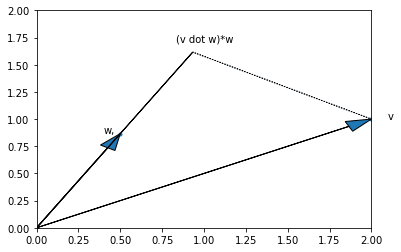

In [148]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2,1]
    w = [math.sqrt(0.25), math.sqrt(0.75)]
    c = dot(v,w)
    vonw = scalar_multiply(c,w)
    o = [0,0]
    
    plt.arrow(0,0,v[0],v[1],width=0.0002,head_width =.1,length_includes_head = True)
    plt.annotate("v",v,xytext =[v[0]+0.1,v[1]])
    plt.arrow(0,0,w[0],w[1],width=0.0002,head_width =.1,length_includes_head = True)
    plt.annotate("w,",w,xytext =[w[0]-0.1,w[1]])
    plt.arrow(0,0,vonw[0],vonw[1],length_includes_head =True)
    plt.annotate(u"(v dot w)*w", vonw,xytext=[vonw[0]-0.1,vonw[1]+0.1])
    plt.arrow(v[0],v[1],vonw[0]-v[0],vonw[1]-v[1],linestyle ="dotted",length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2])
    plt.show()
             
make_graph_dot_product_as_vector_projection(plt)

In [241]:
# matrix dot product

A = [[1,2,3],
     [4,5,6]]

B = [[1,2],
     [3,4],
     [5,6]]

def my_matrix_dot(A,B):
    if len(A[0]) != len(B):
        raise ArithmeticError("A행렬의 열과 B행렬의 행 크기가 같지 않음")
    row = len(A)
    col = len(B[0])
    
    def entry_fn(i,j):
        return dot(A[i],get_column(B,j))
    
    return make_matrix(row,col,entry_fn)

my_matrix_dot(A,B)

np.dot(A,B)

[[22, 28], [49, 64]]

array([[22, 28],
       [49, 64]])

In [240]:
def my_matrix_transpose(M):
    row = len(M)
    col = len(M[0])
    def entry_fn(i,j):
        return M[j][i]
    return make_matrix(col,row,entry_fn)

A = [[2,3],
     [2,5],
     [4,5]]    

print(my_matrix_transpose(A))

np.transpose(A)

[[2, 2, 4], [3, 5, 5]]


array([[2, 2, 4],
       [3, 5, 5]])

### 201600974 무역학과 김효훈